<a href="https://colab.research.google.com/github/Kira1108/PromptEngineering/blob/main/Prompt_Langchain_Fewshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output
!pip install openai langchain sentencepiece tiktoken
clear_output()

In [3]:
from langchain.prompts import PromptTemplate, ChatPromptTemplate, FewShotPromptTemplate

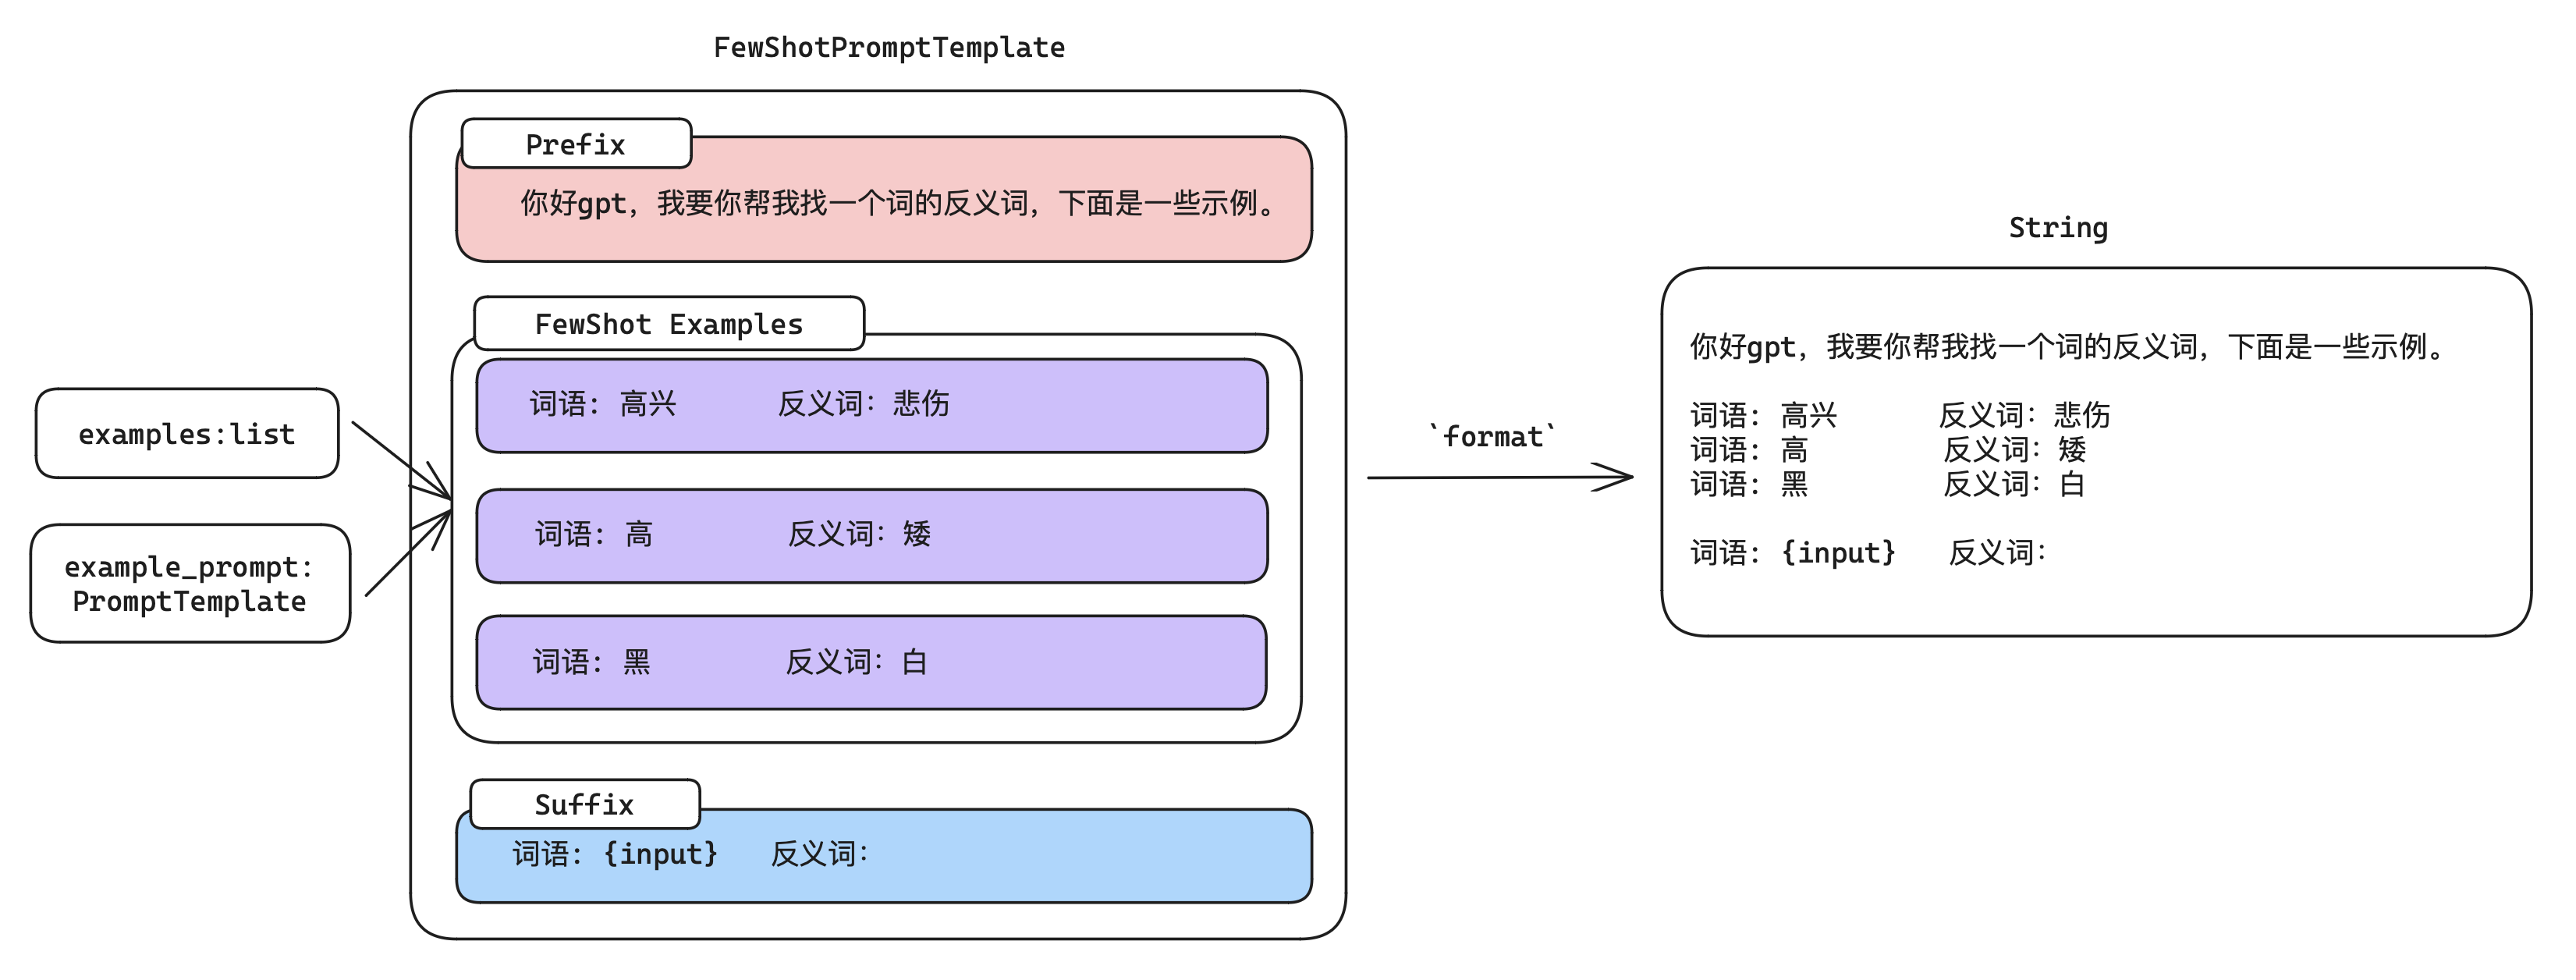

### Step 1: 开发Exmple的部分

In [33]:
# 这边是一系列的小样本
examples = [
    {"word": "happy", "antonym": "sad"},
    {"word": "tall", "antonym": "short"},
    {"word": "black", "antonym":"white"}
]

# 小样本在提示中怎么组织
example_formatter_template = """
Word: {word}
Antonym: {antonym}\n
"""

# 把小样本这个东西给组织起来
example_prompt = PromptTemplate(
    input_variables=["word", "antonym"],
    template=example_formatter_template,
)

# 单一的example是这样的
single_example = example_prompt.format(word = 'happy', antonym = "sad")
print("Single Exmaple...")
print(single_example)

# 多个exmaple还是要循环的
print("FewShot Exmaples...")
for e in examples:
    print(example_prompt.format(**e))

Single Exmaple...

Word: happy
Antonym: sad


FewShot Exmaples...

Word: happy
Antonym: sad



Word: tall
Antonym: short



Word: black
Antonym: white




到这儿我们就把Example给开发完事儿了

## Step 2： 开发提示语和样本输入

In [38]:
few_shot_prompt = FewShotPromptTemplate(
    # 先把examples拿过来 (示例list)
    examples=examples,
    # 示例的格式 prompt
    example_prompt=example_prompt,
    # 示例之前你想要说一些什么指令，这条prompt的核心功能，比如task啥的，都在这儿写，非常重要
    prefix="Give the antonym of every input",
    # 用户舒服部分，这部分，你要给用户输入， 这也是这条few_shot_prompt的format方法需要接收的参数
    suffix="Word: {input}\nAntonym:",
    # 显示的规定好这条prompt的参数 （通常是在suffix部分）
    input_variables=["input"],
    # 这条提示分成了3个部分，这个分隔符用来连接这三个部分
    example_separator="\n\n",
)

final_prompt = few_shot_prompt.format(input = "sexy")
print(final_prompt)

Give the antonym of every input


Word: happy
Antonym: sad




Word: tall
Antonym: short




Word: black
Antonym: white



Word: sexy
Antonym:


这样就算完成了这个prompt的开发。        
通常来说，这样就够了，可以用了。    